In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████| 1.21G/1.21G [00:57<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [2]:
import pandas as pd
import os

# Assuming the dataset downloaded in the previous cell is extracted into a directory
# and the CSV file is located at 'gtzan-dataset-music-genre-classification/Data/features_30_sec.csv'
csv_path = os.path.join(path, 'Data', 'features_30_sec.csv')

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_path)
    print("Dataset loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file {csv_path} was not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully!


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [5]:
df.isnull().sum()

,0
filename,0
length,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0


In [20]:
X=df.drop(columns=['filename','label'])
y=df['label']

In [22]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Original labels:", y.unique())
print("Encoded labels:", label_encoder.classes_)
print("Encoded y (first 5 values):", y_encoded[:5])

Original labels: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Encoded labels: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Encoded y (first 5 values): [0 0 0 0 0]


In [26]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first 5 rows of the scaled features
print("Scaled X (first 5 rows):")
display(X_scaled[:5])

Scaled X (first 5 rows):


array([[-0.13282213, -0.35013678,  0.31258717, -0.01068969, -0.06185589,
        -0.5835852 , -0.84831131, -0.45640248, -0.53104201, -0.48647252,
        -0.66193361, -0.49204509, -0.73434937,  0.19050282, -0.37499162,
         0.37275672,  0.00432643,  0.12536307,  0.30847037, -0.42744458,
         0.70309345, -0.93639809, -0.47269061, -0.81084363,  0.36466458,
        -0.59684161, -0.42732103, -0.06423578,  0.33717421, -0.55597237,
        -0.86315362, -0.8344325 ,  0.49951802, -0.46959533, -0.63770406,
        -0.16118663,  0.40925862, -0.49971511, -0.33836791, -0.36147796,
         0.64538476, -0.53441001,  0.18219014, -0.80434978,  0.79228723,
        -0.70309227, -0.26555766, -0.38652827, -0.08639575, -0.24611385,
         0.50046241, -0.78026476, -0.23704039, -0.64317667,  0.00672291,
        -0.30059734,  0.60406407, -0.51298758],
       [-0.13282213, -0.46248155,  1.11757233, -0.53285232, -0.18682068,
        -0.93851571, -0.23419449, -0.38685162,  0.79625194, -0.64868145,
   

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 58)
X_test shape: (200, 58)
y_train shape: (800,)
y_test shape: (200,)


## Train random forest model

### Subtask:
Train a Random Forest classifier on the training data.


**Reasoning**:
Train a Random Forest classifier on the training data.



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


## Train two other models

### Subtask:
Train two different classification models (e.g., Logistic Regression, Support Vector Machine, K-Nearest Neighbors, etc.) on the training data.


**Reasoning**:
Train a Logistic Regression model and a K-Nearest Neighbors model on the training data as requested by the subtask.



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

# Instantiate and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors model trained successfully!")

Logistic Regression model trained successfully!
K-Nearest Neighbors model trained successfully!


## Make predictions

### Subtask:
Use the trained models to make predictions on the test data.


**Reasoning**:
Use the trained models to make predictions on the test data as requested by the subtask instructions.



In [31]:
# Use the trained Random Forest model to make predictions
rf_predictions = rf_model.predict(X_test)

# Use the trained Logistic Regression model to make predictions
lr_predictions = lr_model.predict(X_test)

# Use the trained K-Nearest Neighbors model to make predictions
knn_predictions = knn_model.predict(X_test)

print("Predictions made successfully for all models.")

Predictions made successfully for all models.


## Evaluate models

### Subtask:
Calculate the accuracy and generate the confusion matrix for each model using the true labels and the predictions.


**Reasoning**:
Import the necessary metrics functions and calculate and print the accuracy and confusion matrix for each model.



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
display(rf_conf_matrix)

# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

print("\nLogistic Regression Model:")
print(f"Accuracy: {lr_accuracy}")
print("Confusion Matrix:")
display(lr_conf_matrix)

# Evaluate K-Nearest Neighbors model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

print("\nK-Nearest Neighbors Model:")
print(f"Accuracy: {knn_accuracy}")
print("Confusion Matrix:")
display(knn_conf_matrix)

Random Forest Model:
Accuracy: 0.755
Confusion Matrix:


array([[17,  0,  0,  0,  0,  0,  1,  0,  0,  2],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0, 16,  0,  0,  1,  0,  0,  0,  4],
       [ 0,  0,  0, 15,  5,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1, 13,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0, 20,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  4,  0],
       [ 2,  0,  1,  0,  3,  0,  1,  1, 14,  1],
       [ 1,  0,  4,  1,  1,  0,  2,  1,  1, 10]])


Logistic Regression Model:
Accuracy: 0.71
Confusion Matrix:


array([[13,  0,  1,  0,  0,  1,  1,  0,  2,  2],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0, 18,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  2, 11,  3,  0,  0,  0,  2,  3],
       [ 1,  0,  0,  0, 11,  1,  0,  0,  2,  0],
       [ 2,  0,  0,  1,  0, 19,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  1,  0, 22,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 11,  1,  0],
       [ 2,  0,  1,  2,  1,  0,  2,  1, 11,  3],
       [ 2,  0,  1,  1,  2,  0,  0,  1,  1, 13]])


K-Nearest Neighbors Model:
Accuracy: 0.645
Confusion Matrix:


array([[11,  0,  3,  0,  0,  0,  1,  0,  1,  4],
       [ 0, 11,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  1, 21,  0,  1,  1,  0,  0,  1,  1],
       [ 2,  0,  2, 14,  1,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  2, 10,  0,  0,  1,  2,  0],
       [ 0,  2,  3,  2,  0, 14,  0,  0,  0,  1],
       [ 0,  0,  0,  4,  0,  0, 20,  0,  0,  1],
       [ 1,  0,  1,  1,  0,  1,  0,  8,  1,  0],
       [ 1,  0,  2,  3,  5,  0,  1,  1, 10,  0],
       [ 3,  1,  4,  1,  0,  0,  0,  1,  1, 10]])

## Compare results

### Subtask:
Display the accuracy and confusion matrices for all three models to compare their performance.


**Reasoning**:
Print the accuracy and confusion matrices for all three models to compare their performance.



In [33]:
print("--- Model Performance Comparison ---")

print("\nAccuracy Scores:")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"Logistic Regression: {lr_accuracy:.4f}")
print(f"K-Nearest Neighbors: {knn_accuracy:.4f}")

print("\n--- Confusion Matrices ---")

print("\nRandom Forest Confusion Matrix:")
display(rf_conf_matrix)

print("\nLogistic Regression Confusion Matrix:")
display(lr_conf_matrix)

print("\nK-Nearest Neighbors Confusion Matrix:")
display(knn_conf_matrix)

--- Model Performance Comparison ---

Accuracy Scores:
Random Forest: 0.7550
Logistic Regression: 0.7100
K-Nearest Neighbors: 0.6450

--- Confusion Matrices ---

Random Forest Confusion Matrix:


array([[17,  0,  0,  0,  0,  0,  1,  0,  0,  2],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0, 16,  0,  0,  1,  0,  0,  0,  4],
       [ 0,  0,  0, 15,  5,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1, 13,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0, 20,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  4,  0],
       [ 2,  0,  1,  0,  3,  0,  1,  1, 14,  1],
       [ 1,  0,  4,  1,  1,  0,  2,  1,  1, 10]])


Logistic Regression Confusion Matrix:


array([[13,  0,  1,  0,  0,  1,  1,  0,  2,  2],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0, 18,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  2, 11,  3,  0,  0,  0,  2,  3],
       [ 1,  0,  0,  0, 11,  1,  0,  0,  2,  0],
       [ 2,  0,  0,  1,  0, 19,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  1,  0, 22,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 11,  1,  0],
       [ 2,  0,  1,  2,  1,  0,  2,  1, 11,  3],
       [ 2,  0,  1,  1,  2,  0,  0,  1,  1, 13]])


K-Nearest Neighbors Confusion Matrix:


array([[11,  0,  3,  0,  0,  0,  1,  0,  1,  4],
       [ 0, 11,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  1, 21,  0,  1,  1,  0,  0,  1,  1],
       [ 2,  0,  2, 14,  1,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  2, 10,  0,  0,  1,  2,  0],
       [ 0,  2,  3,  2,  0, 14,  0,  0,  0,  1],
       [ 0,  0,  0,  4,  0,  0, 20,  0,  0,  1],
       [ 1,  0,  1,  1,  0,  1,  0,  8,  1,  0],
       [ 1,  0,  2,  3,  5,  0,  1,  1, 10,  0],
       [ 3,  1,  4,  1,  0,  0,  0,  1,  1, 10]])

In [35]:
import os
import cv2
import numpy as np

# Define the path to the images directory
images_path = os.path.join(path, 'Data', 'images_original')

# Create lists to store images and labels
images = []
labels = []

# Iterate through each genre folder
for genre_folder in os.listdir(images_path):
    genre_path = os.path.join(images_path, genre_folder)
    if os.path.isdir(genre_path):
        # Iterate through each image in the genre folder
        for image_file in os.listdir(genre_path):
            image_path = os.path.join(genre_path, image_file)
            # Read the image
            img = cv2.imread(image_path)
            # Append the image and label
            images.append(img)
            labels.append(genre_folder)

print(f"Loaded {len(images)} images with labels.")

Loaded 999 images with labels.


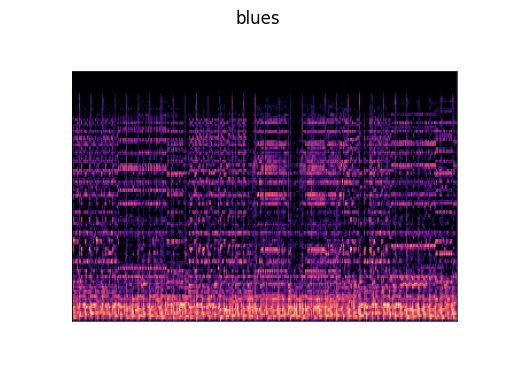

In [37]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.title(labels[0])
plt.axis('off')
plt.show()

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import pathlib

# 1) Paths
data_dir = images_path # Corrected from image_path to images_path
batch_size = 32
img_size = (288, 432)          # matches original size
seed = 123

# 2) Train / validation split (80/20)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size)

# 3) Prefetch for speed
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)

# 4) CNN model
num_classes = 10
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(*img_size, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5) Train
epochs = 50
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

# 6) Evaluate
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.3f}")

Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.1242 - loss: 2.3072 - val_accuracy: 0.0704 - val_loss: 2.3078
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.1069 - loss: 2.3041 - val_accuracy: 0.0704 - val_loss: 2.3077
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.1108 - loss: 2.2802 - val_accuracy: 0.2060 - val_loss: 2.2545
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.1893 - loss: 2.1906 - val_accuracy: 0.1910 - val_loss: 2.1568
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.1829 - loss: 2.1721 - val_accuracy: 0.1709 - val_loss: 2.1550
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.1675 - loss: 2.1208 - val_accuracy: 0.1859 - val_loss: 2.1319
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.1801 - loss: 2.1004 - val_accuracy: 0.1960 - val_loss: 2.1397
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.1924 - loss: 2.0864 - val_accuracy: 0.2261 - val_

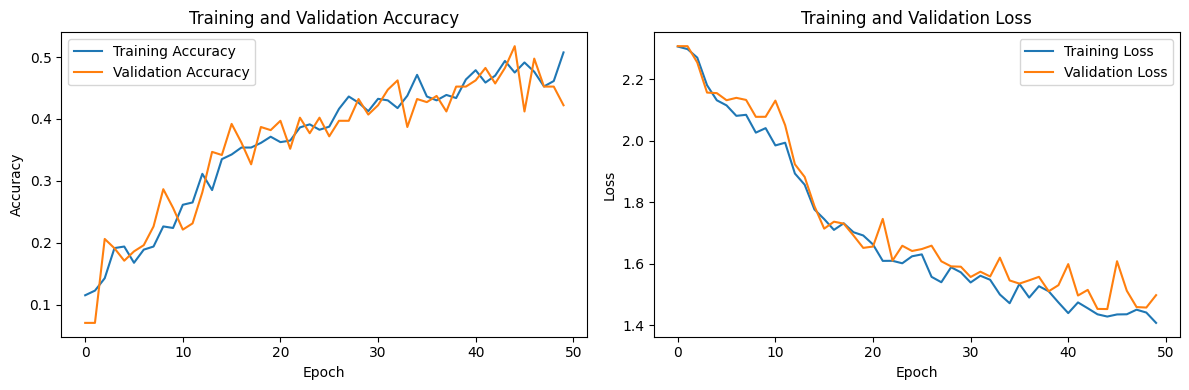

In [51]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()